# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Customers Segmentation
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1Q43AkxxDy4g-zl5lIX4_PBJtTguh4Ise)

![alt text](https://drive.google.com/uc?id=1uS6vsccMt3koetsp3k9cAIfbpJw7Z1J8)

![alt text](https://drive.google.com/uc?id=1r1FjdO8duujUoI904Oy4vbza6KktxSXo)

![alt text](https://drive.google.com/uc?id=1vMr3ouoZ6Pc1mba1mBm2eovlJ3tfE6JA)

![alt text](https://drive.google.com/uc?id=1VvqzWWY8wFGeP4cl-rVtWVOg1P6saHfZ)

![alt text](https://drive.google.com/uc?id=1LpdL0-4E9lbc4s-x6eJ5zkyIVw_OpHuJ)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
marketing_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science/Marketing_data.csv')
# You have to include the full link to the csv file containing your dataset

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [ ]:
marketing_df.describe().transpose() # descriptive statistics

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [ ]:
# Let's see who made one off purchase of $40761!
marketing_df[marketing_df['ONEOFF_PURCHASES'] >= 40000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
501,C10523,13479.28821,1.0,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.250000,12


In [ ]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full
marketing_df[marketing_df['CASH_ADVANCE'] >= 40000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TASK #3: VISUALIZE AND EXPLORE DATASET

In [ ]:
# Let's see if we have a lot of missing data, luckily we don't!
marketing_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
marketing_df['MINIMUM_PAYMENTS'] = marketing_df['MINIMUM_PAYMENTS'].fillna(marketing_df['MINIMUM_PAYMENTS'].mean())

In [ ]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
marketing_df['CREDIT_LIMIT'] = marketing_df['CREDIT_LIMIT'].fillna(marketing_df['CREDIT_LIMIT'].mean())

In [ ]:
# Let's see if we have duplicated entries in the data
marketing_df.duplicated().sum()

0

In [ ]:
# Let's drop Customer ID since it has no meaning here 
marketing_df = marketing_df.drop(['CUST_ID'], axis=1)

In [ ]:
marketing_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
marketing_df.shape

(8950, 17)

In [ ]:
marketing_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

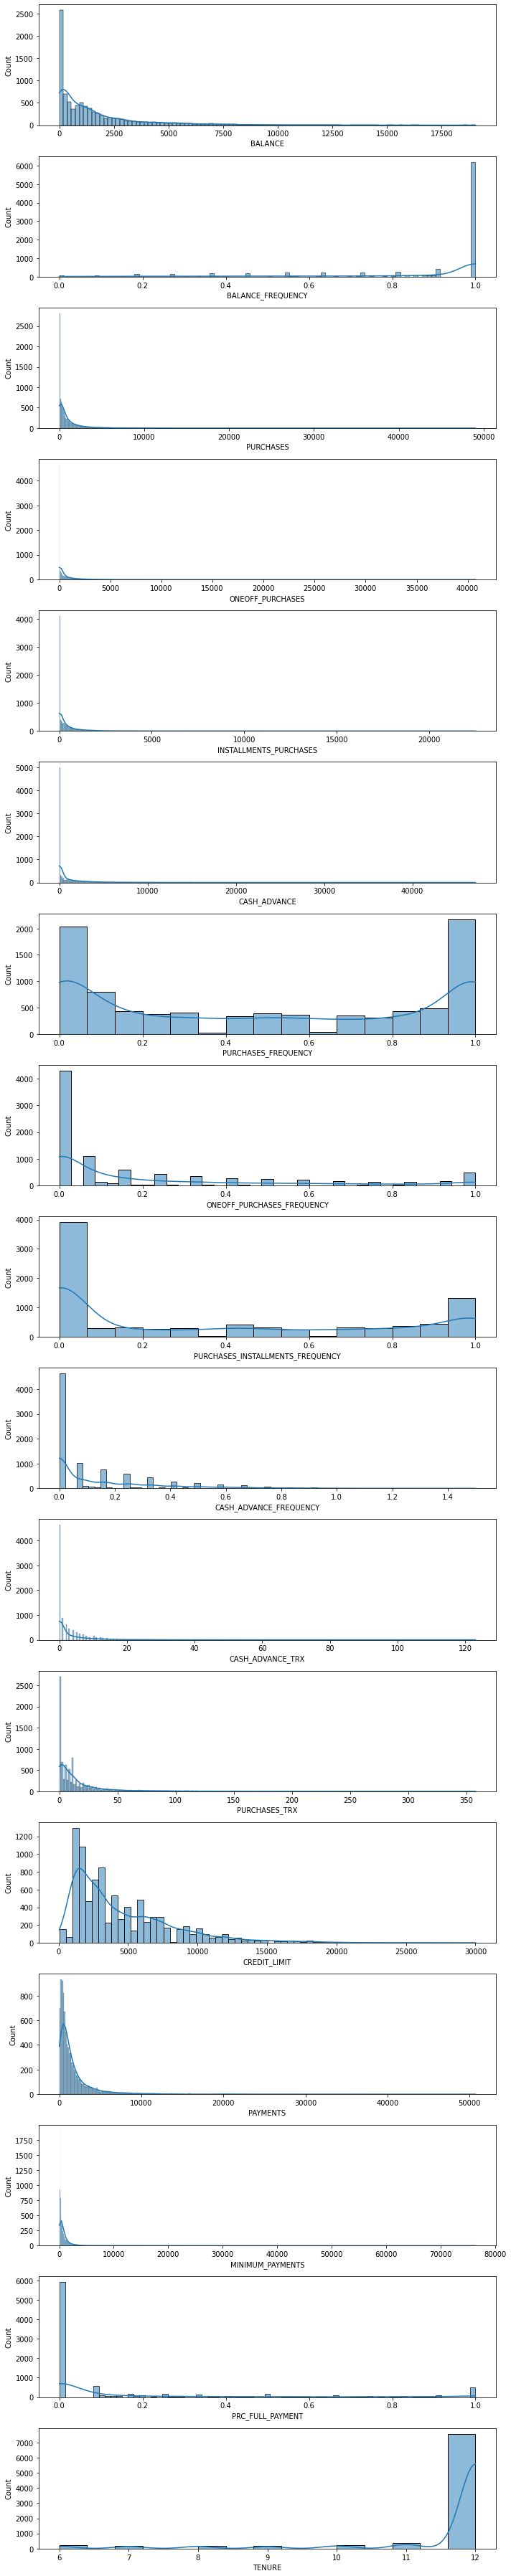

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(marketing_df.columns)):
  plt.subplot(17,1,i+1)
  sns.histplot(data=marketing_df, x=marketing_df.columns[i], kde=True)
plt.tight_layout() # check the general tendencies of the variables/features

In [ ]:
pd.DataFrame(marketing_df.corr()['PURCHASES']) # correlations of purchases

,PURCHASES
BALANCE,0.181261
BALANCE_FREQUENCY,0.133674
PURCHASES,1.000000
ONEOFF_PURCHASES,0.916845
INSTALLMENTS_PURCHASES,0.679896
CASH_ADVANCE,-0.051474
PURCHASES_FREQUENCY,0.393017
ONEOFF_PURCHASES_FREQUENCY,0.498430
PURCHASES_INSTALLMENTS_FREQUENCY,0.315567
CASH_ADVANCE_FREQUENCY,-0.120143


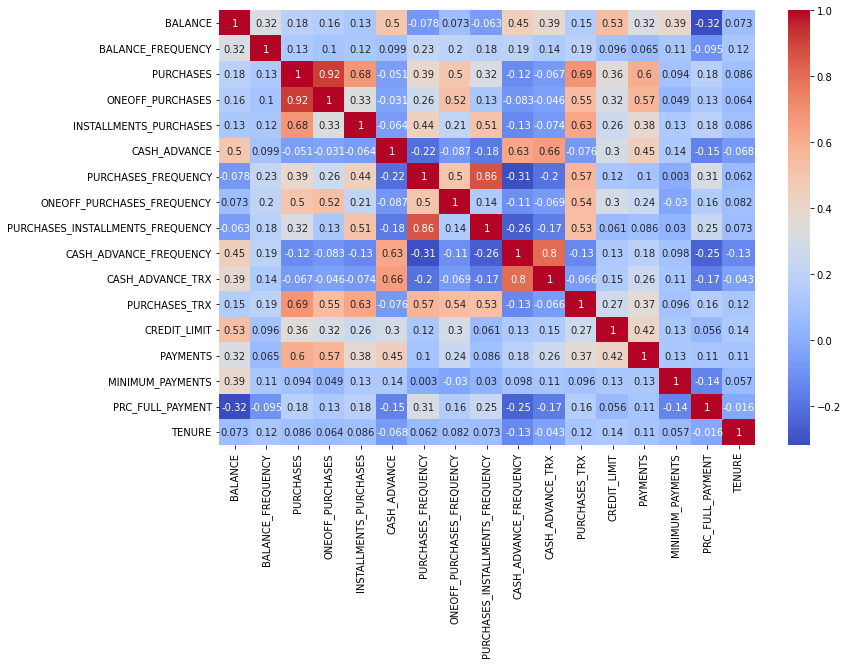

In [ ]:

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'
plt.figure(figsize=(12,8))
sns.heatmap(marketing_df.corr(), annot=True, cmap='coolwarm')

# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

![alt text](https://drive.google.com/uc?id=1EBCmP06GuRjVfPgTfH85Yhv9xIAZUj-K)

![alt text](https://drive.google.com/uc?id=1EYWyoec9Be9pYkOaJTjPooTPWgRlJ_Xz)

![alt text](https://drive.google.com/uc?id=1ppL-slQPatrmHbPBEaT3-8xNH01ckoNE)

![alt text](https://drive.google.com/uc?id=1Yfi-dpWW3keU5RLgwAT4YmQ2rfY1GxUh)

![alt text](https://drive.google.com/uc?id=1bLRDIZRda0NSTAdcbugasIjDjvgw4JIU)

![alt text](https://drive.google.com/uc?id=1rBQziDU0pS1Fz0m8VQRjQuBoGFSX1Spb)

![alt text](https://drive.google.com/uc?id=1BOX2q8R_8E4Icb4v1tpn1eymCTJY2b5o)

![alt text](https://drive.google.com/uc?id=1v7hJEPiigSeTTaYo0djbO-L4uEnTpcAU)

# TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [ ]:
# Let's scale the data first
scaler = StandardScaler()
X = scaler.fit_transform(marketing_df)

In [ ]:
X.shape

(8950, 17)

In [ ]:
scores = []

for k in range(1,15):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(X)
  scores.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

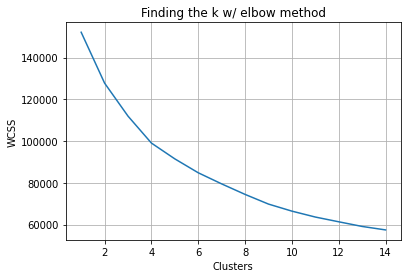

In [ ]:
sns.lineplot(x=range(1,15), y=scores)
plt.grid()
plt.title('Finding the k w/ elbow method') # 4 or 6 looks good
plt.xlabel('Clusters')
plt.ylabel('WCSS')

In [ ]:
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 6.

# TASK #6: APPLY K-MEANS METHOD

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(n_clusters=6)

In [ ]:
labels = kmeans.labels_ # also possible with predict, but that is more used for new data

In [ ]:
marketing_df['cluster'] = labels
marketing_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


In [ ]:
X.shape # with cluster column
kmeans.cluster_centers_.shape

(6, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = marketing_df.columns[:-1]) # the cluster centers with their respective standardized values

In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = marketing_df.columns[:-1])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,111.971653,0.374694,334.395004,209.000465,125.620931,335.263311,0.265580,0.077550,0.179609,0.038210,0.807018,4.127384,3732.825243,1093.299450,267.574608,0.230220,11.295195
1,1851.036530,0.978472,2982.551670,2048.720612,934.284573,330.682005,0.926960,0.751035,0.580203,0.053965,1.075586,44.140590,7013.678967,2833.805467,807.943042,0.281204,11.880574
2,4877.004640,0.966578,566.960000,345.487536,221.578150,5067.584105,0.309945,0.147659,0.202939,0.515581,15.910603,8.644491,8001.408051,3981.946723,2058.187456,0.039313,11.397089
3,4569.720859,0.975499,16157.907683,10956.249146,5201.658537,987.833746,0.924593,0.759664,0.775924,0.075203,2.451220,131.512195,12395.121951,15765.548522,3438.869446,0.396699,11.963415
4,1543.075446,0.965423,265.361154,220.892134,44.631756,807.512306,0.158617,0.102318,0.058080,0.161555,3.055903,3.009865,3284.763784,974.478117,794.572431,0.021801,11.505755
5,738.433679,0.950310,859.277602,186.173496,673.638969,211.658792,0.877524,0.090193,0.817196,0.042405,0.805020,17.745854,3294.383775,1005.110526,733.613272,0.253361,11.483640


In [ ]:
pd.set_option('display.max_rows', 140)
marketing_df.groupby('cluster').describe().transpose() # but this information is better if visualized

cluster                                            0             1  \
BALANCE                          count   1311.000000   1323.000000   
                                 mean     111.971653   1851.036530   
                                 std      231.046577   2258.658031   
                                 min        0.000000      1.198223   
                                 25%        7.098261    289.879323   
                                 50%       25.715061    912.876680   
                                 75%       94.876216   2599.540418   
                                 max     2075.637866  18495.558550   
BALANCE_FREQUENCY                count   1311.000000   1323.000000   
                                 mean       0.374694      0.978472   
                                 std        0.195670      0.072155   
                                 min        0.000000      0.181818   
                                 25%        0.200000      1.000000   
                                 50%        0.363636      1.000000   
                                 75%        0.545455      1.000000   
                                 max        0.833333      1.000000   
PURCHASES                        count   1311.000000   1323.000000   
                                 mean     334.395004   2982.551670   
                                 std      481.418461   1966.958384   
                                 min        0.000000      8.400000   
                                 25%       37.650000   1512.480000   
                                 50%      158.370000   2540.900000   
                                 75%      426.540000   4035.825000   
                                 max     3950.000000  11994.710000   
ONEOFF_PURCHASES                 count   1311.000000   1323.000000   
                                 mean     209.000465   2048.720612   
                                 std      449.557156   1662.157437   
                                 min        0.000000      0.000000   
                                 25%        0.000000    872.450000   
                                 50%        0.000000   1591.650000   
                                 75%      193.400000   2698.015000   
                                 max     3950.000000  11994.710000   
INSTALLMENTS_PURCHASES           count   1311.000000   1323.000000   
                                 mean     125.620931    934.284573   
                                 std      234.413942   1106.790239   
                                 min        0.000000      0.000000   
                                 25%        0.000000    103.795000   
                                 50%        0.000000    599.270000   
                                 75%      163.300000   1375.590000   
                                 max     3011.360000   7571.400000   
CASH_ADVANCE                     count   1311.000000   1323.000000   
                                 mean     335.263311    330.682005   
                                 std      846.220325    836.855632   
                                 min        0.000000      0.000000   
                                 25%        0.000000      0.000000   
                                 50%        0.000000      0.000000   
                                 75%       85.709192     92.031875   
                                 max     6897.966615   7894.578816   
PURCHASES_FREQUENCY              count   1311.000000   1323.000000   
                                 mean       0.265580      0.926960   
                                 std        0.252021      0.130722   
                                 min        0.000000      0.250000   
                                 25%        0.083333      0.916667   
                                 50%        0.166667      1.000000   
                                 75%        0.416667      1.000000   
                                 max        1.000000      1.000000   
ONEOFF_PUR

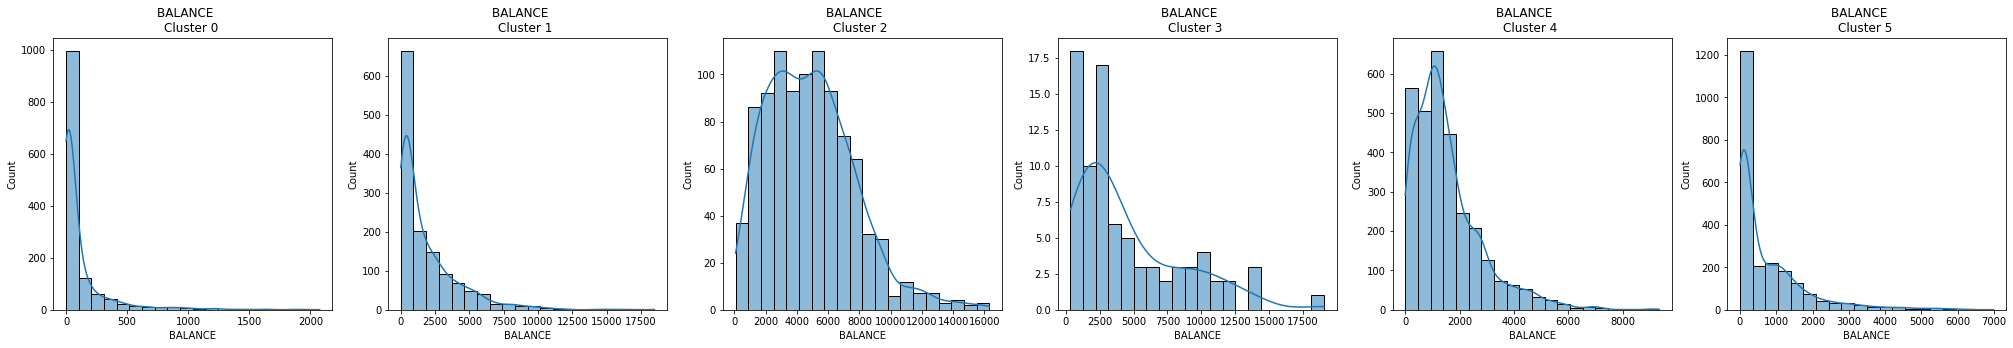

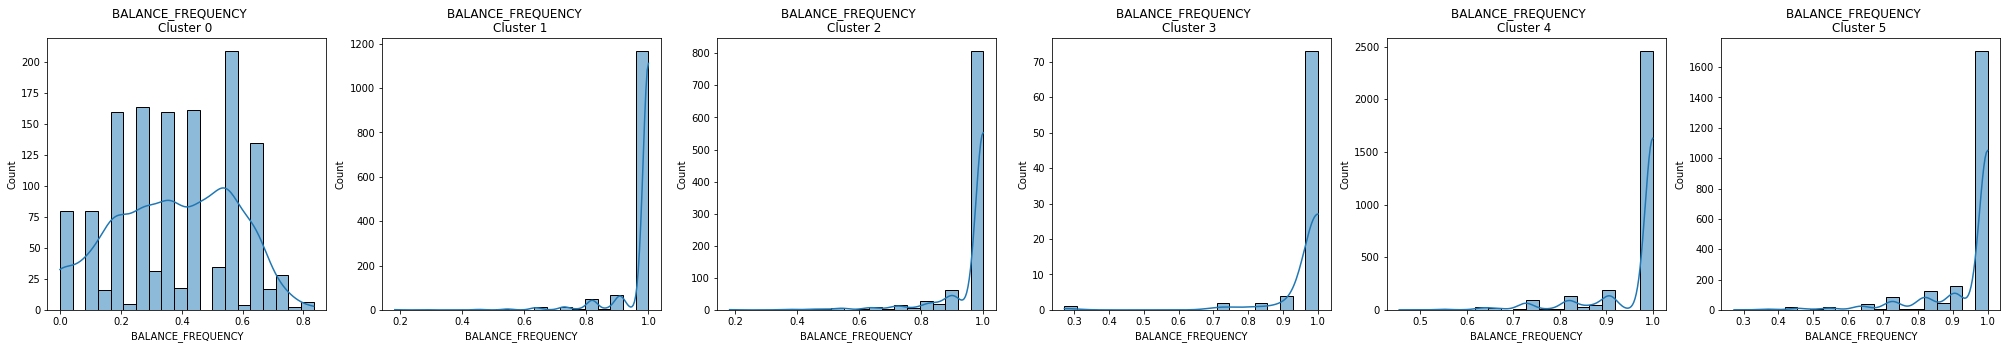

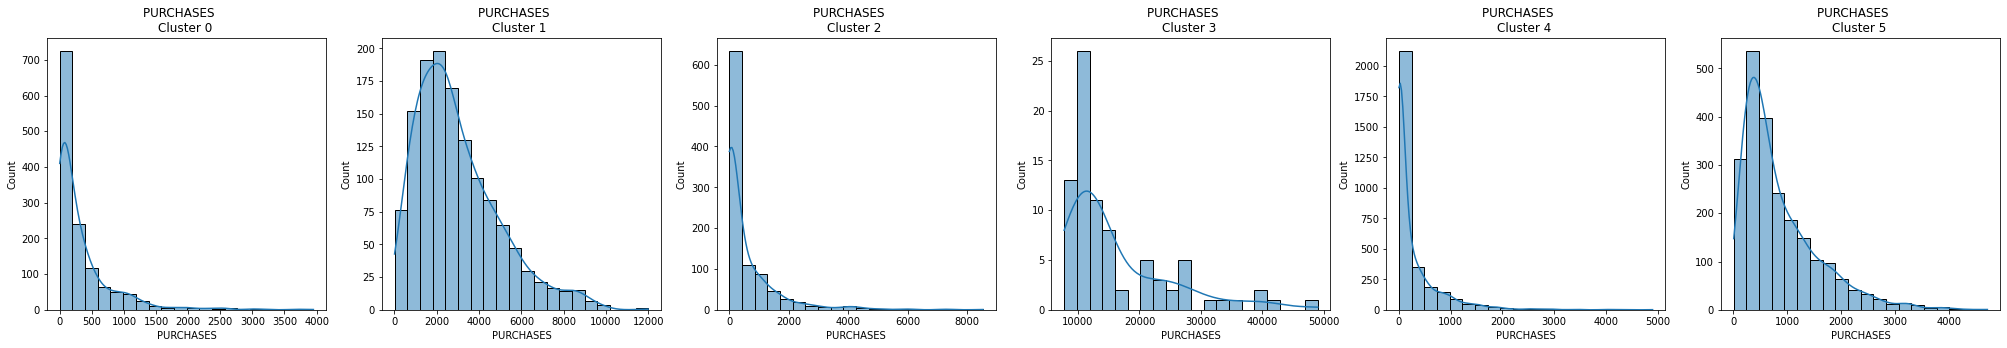

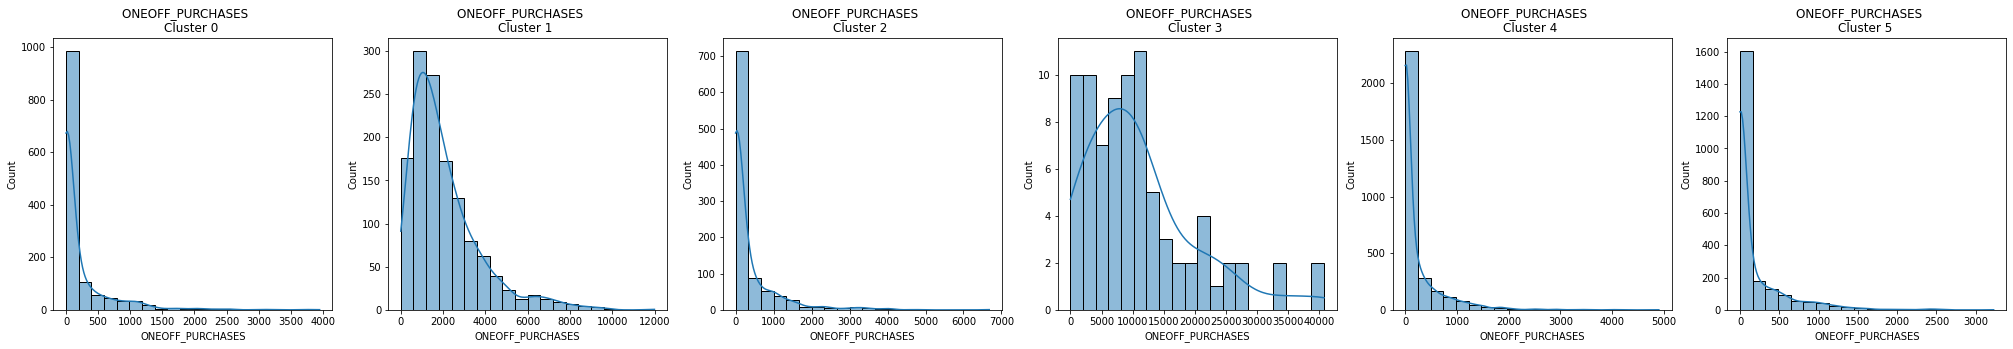

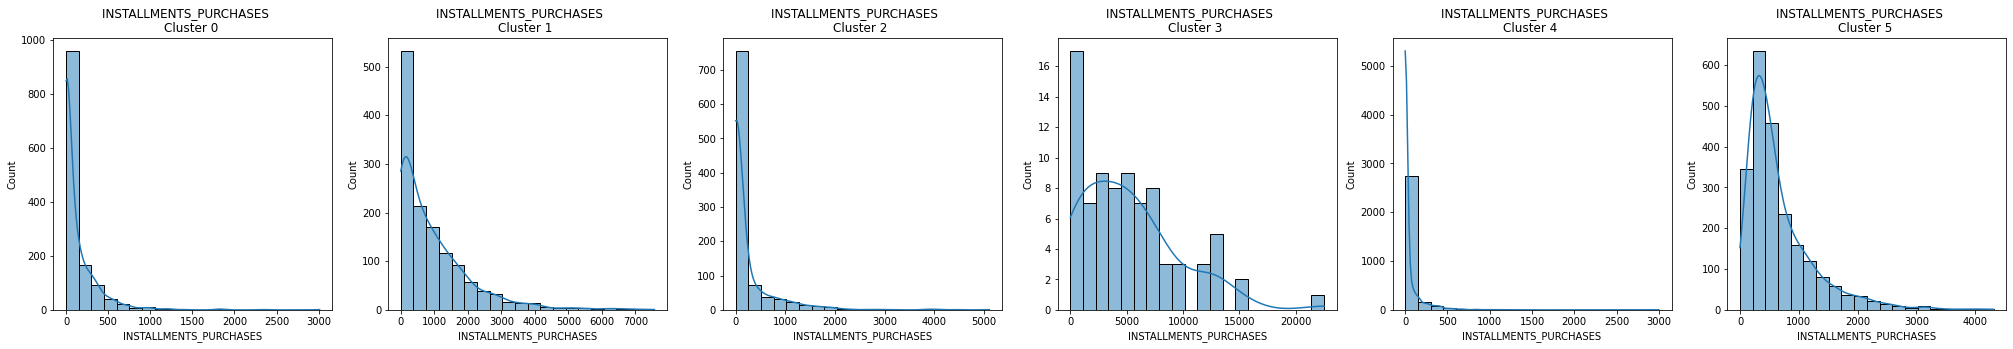

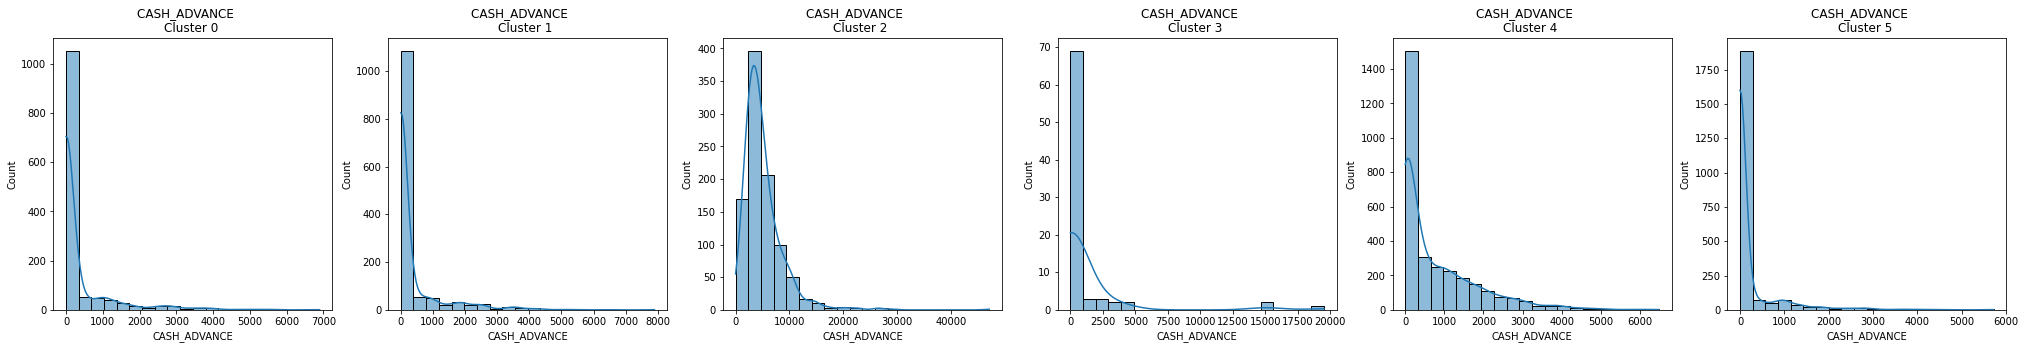

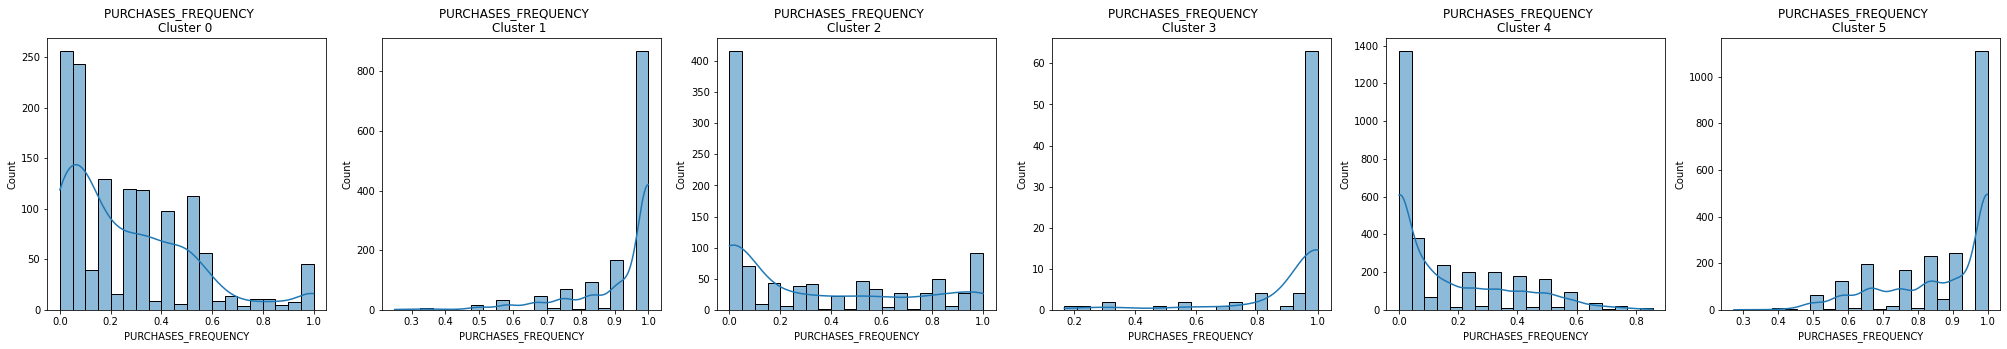

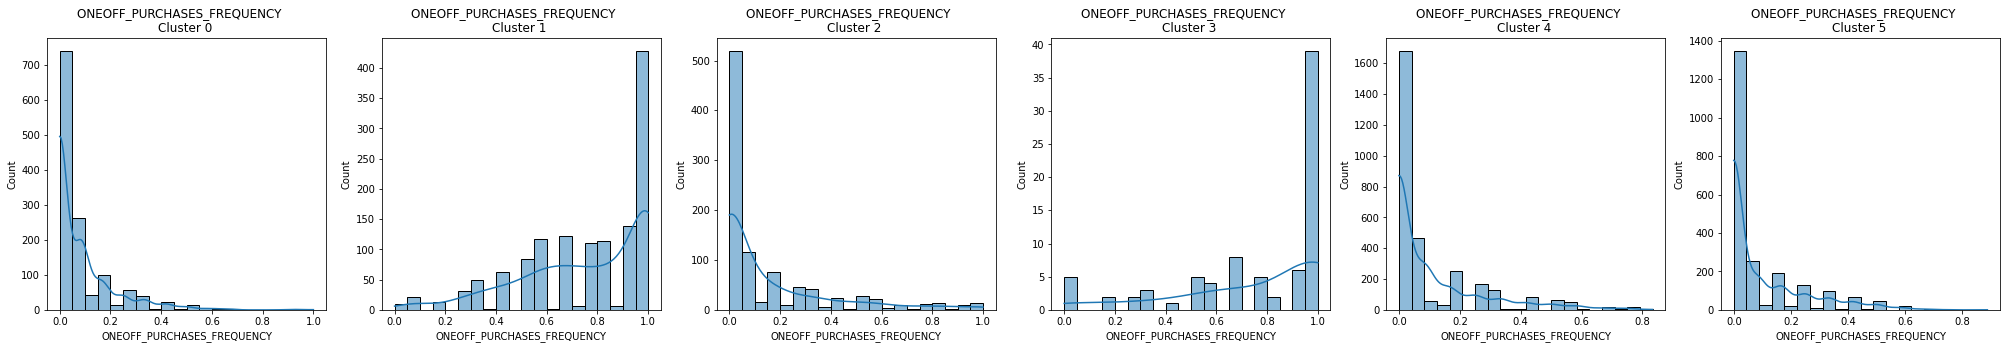

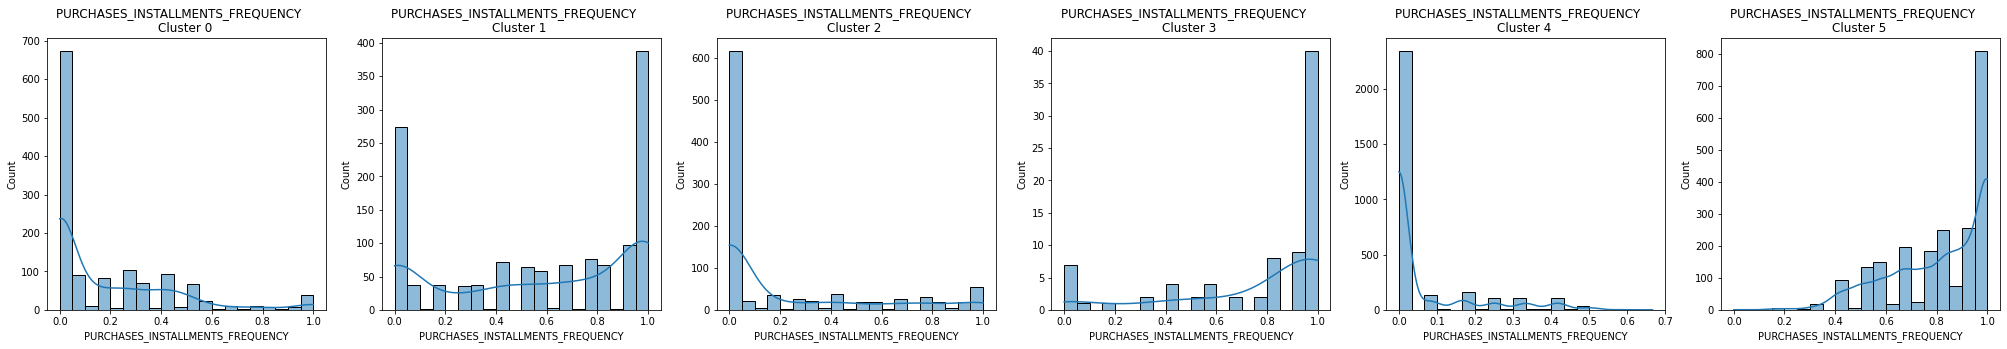

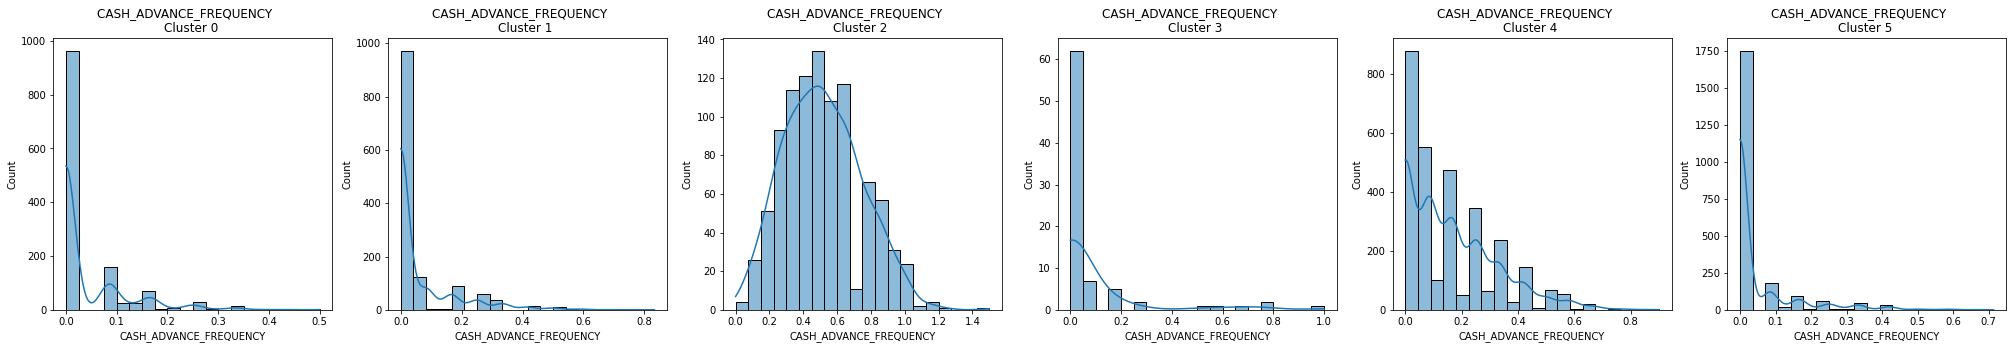

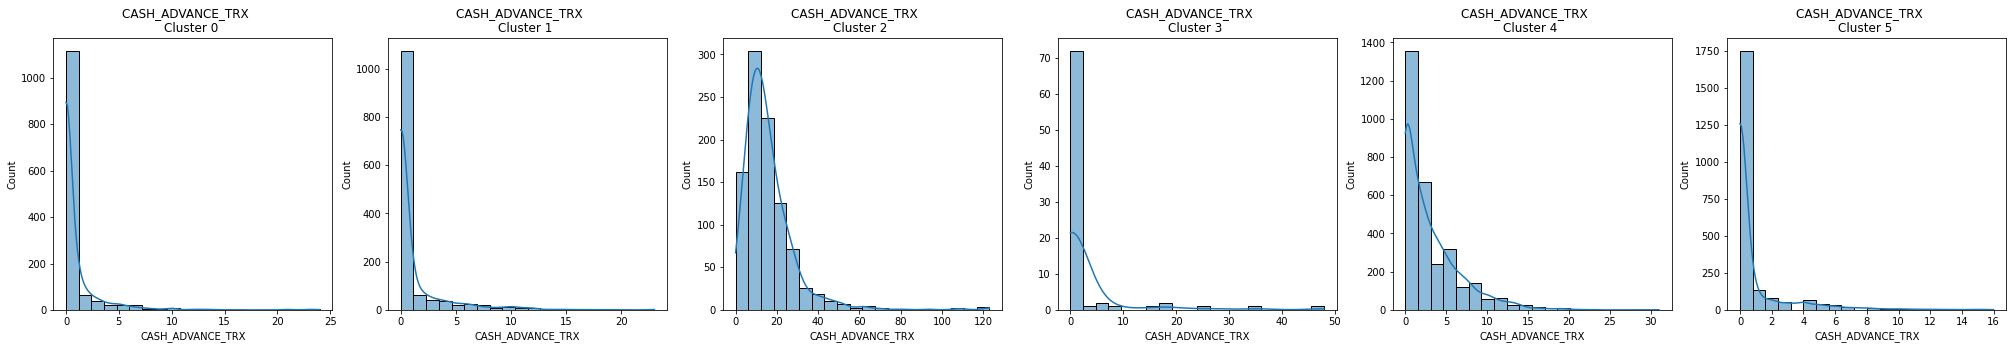

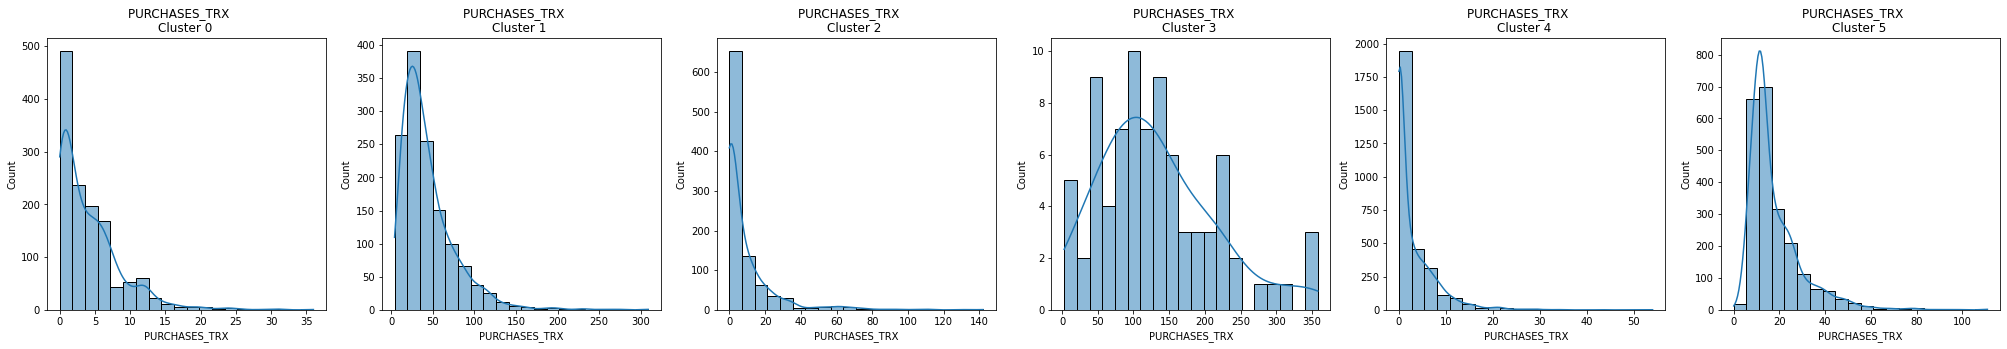

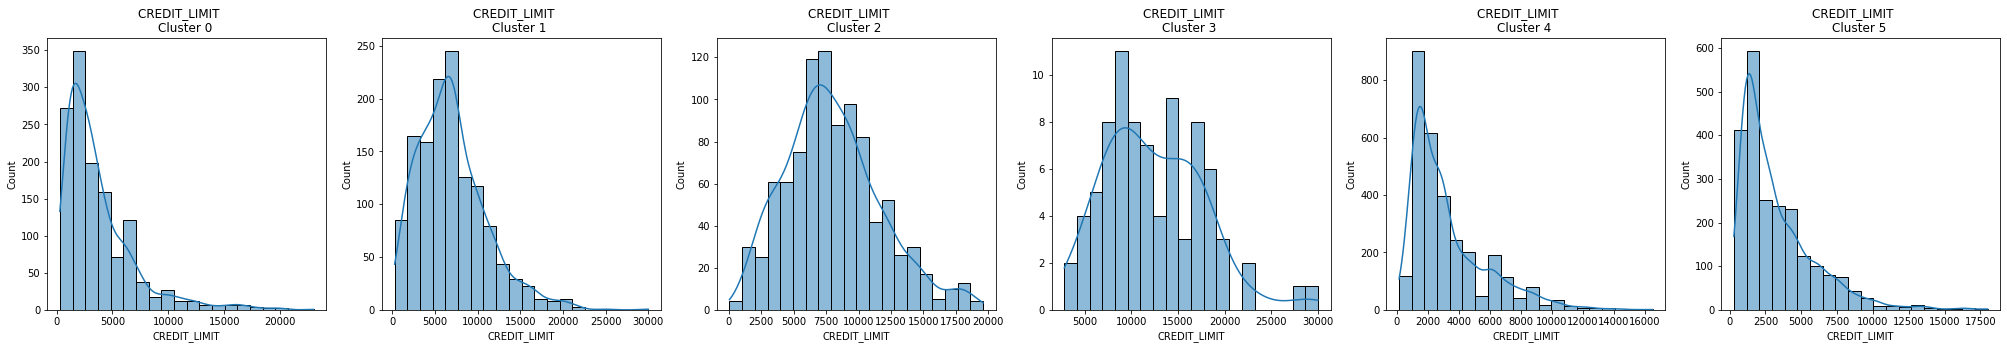

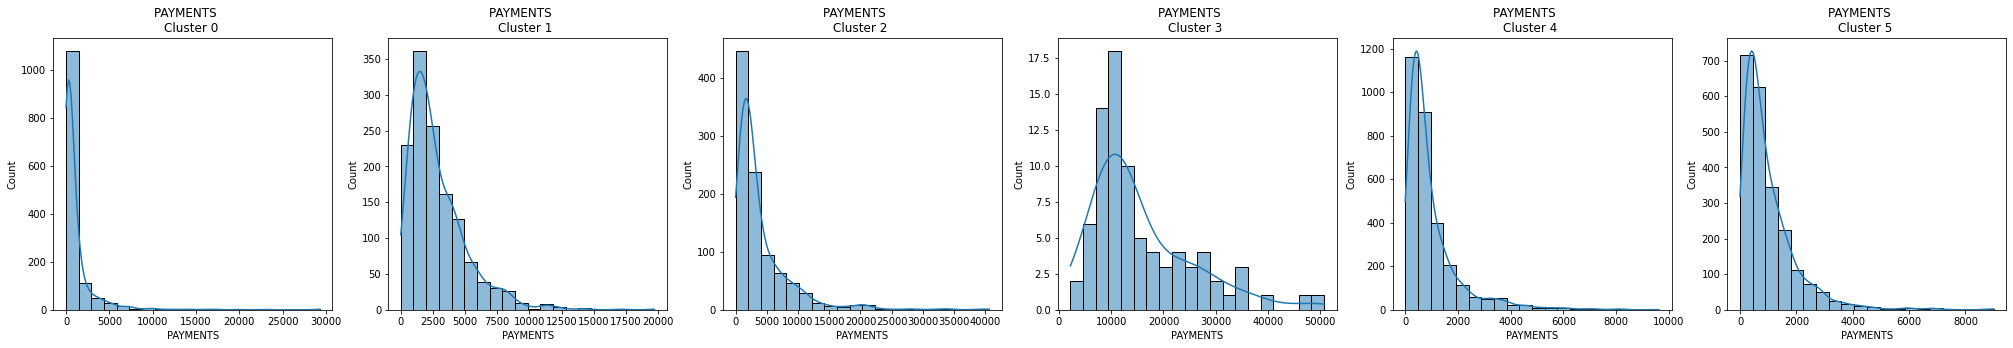

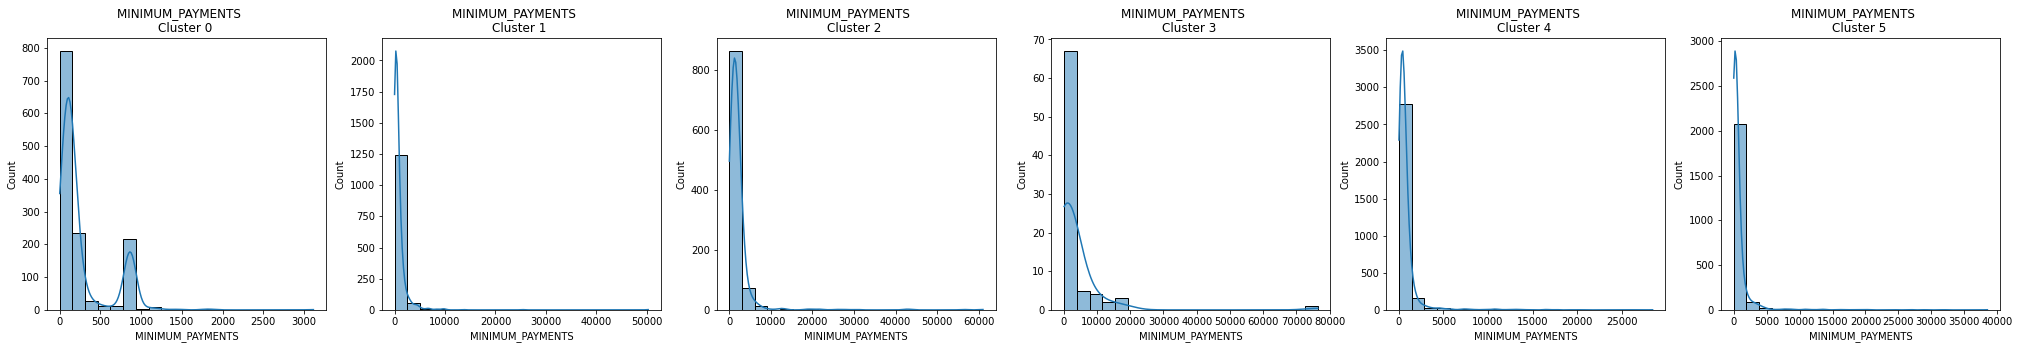

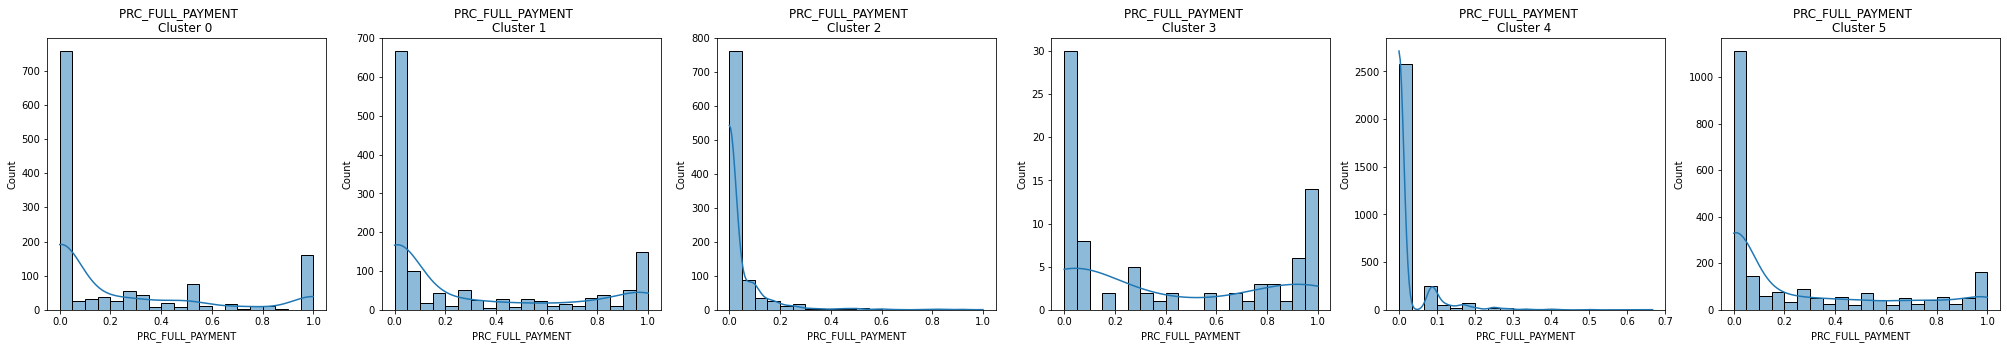

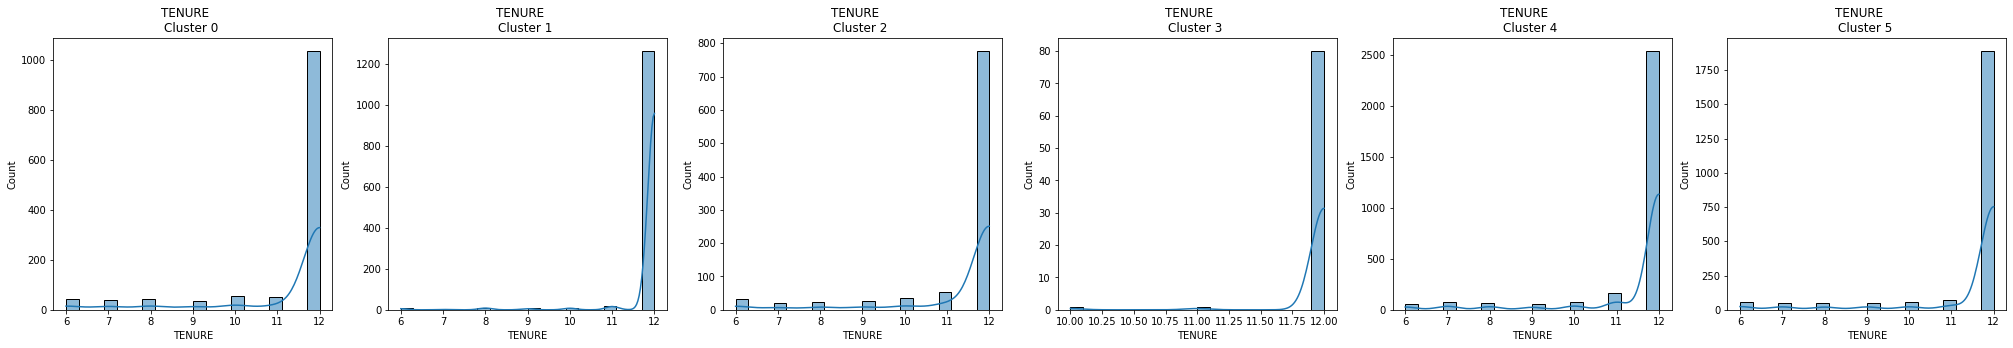

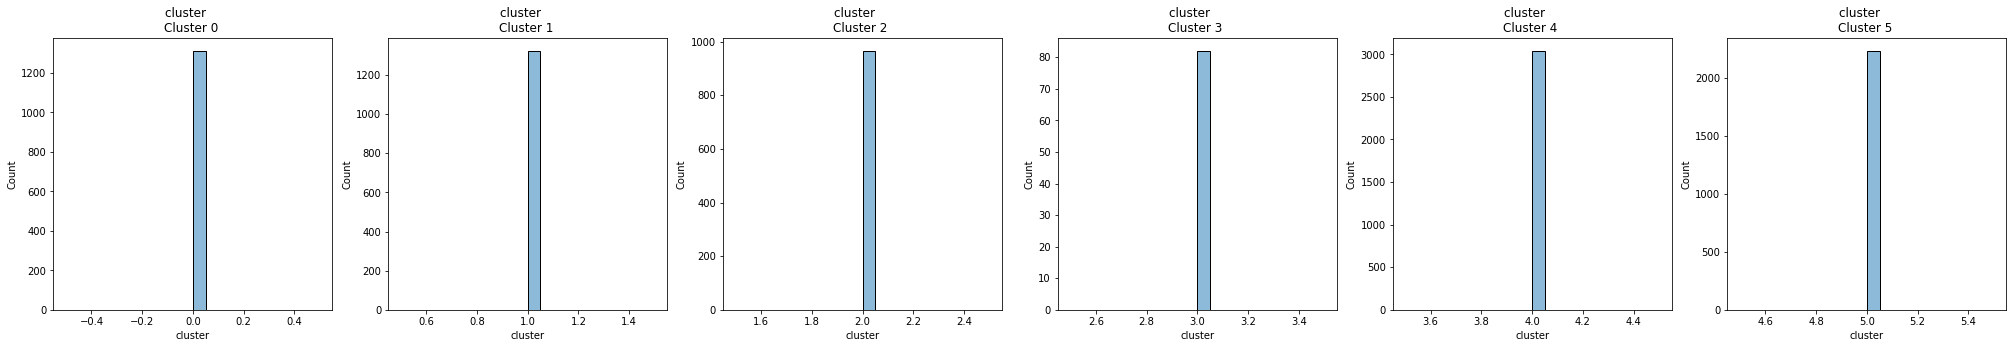

In [ ]:
# Plot the histogram of various clusters and their features
for i in marketing_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(kmeans.n_clusters):
    plt.subplot(1,kmeans.n_clusters,j+1)
    cluster = marketing_df[marketing_df['cluster'] == j]
    sns.histplot(data=cluster[i], bins=20, kde=True)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [ ]:
# Obtain the principal components 
pca = PCA(n_components=2)
components = pca.fit_transform(X)
components

array([[-1.68222045, -1.07644015],
       [-1.13829447,  2.50649749],
       [ 0.96968558, -0.38356885],
       ...,
       [-0.92620394, -1.8107876 ],
       [-2.33655289, -0.6579422 ],
       [-0.55642221, -0.40047439]])

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=components, columns=['pca1', 'pca2'])
pca_df

,pca1,pca2
0,-1.682220,-1.076440
1,-1.138294,2.506497
2,0.969686,-0.383569
3,-0.873628,0.043182
4,-1.599434,-0.688577
...,...,...
8945,-0.359629,-2.016156
8946,-0.564370,-1.639108
8947,-0.926204,-1.810788
8948,-2.336553,-0.657942


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df['cluster'] = labels

In [ ]:
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076440,4
1,-1.138294,2.506497,2
2,0.969686,-0.383569,1
3,-0.873628,0.043182,4
4,-1.599434,-0.688577,4


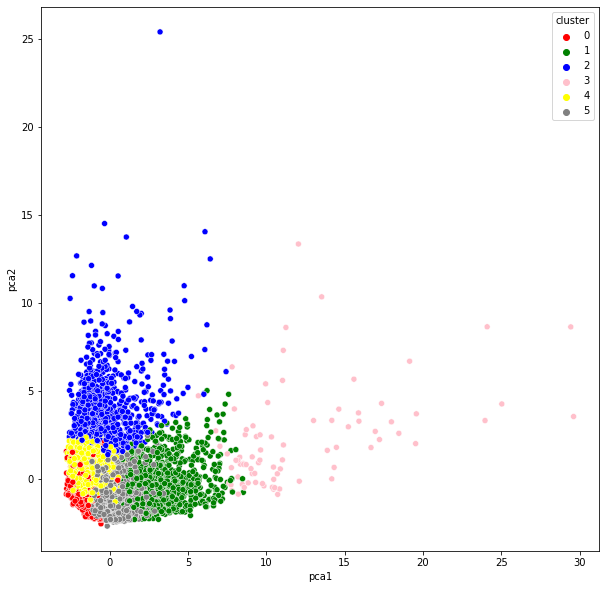

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray'])
plt.show()

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

In [ ]:
input_df = Input(shape=(17,))

In [ ]:
x = Dense(7, activation='relu')(input_df)
x = Dense(250, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(250, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(800, activation='relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

x = Dense(800, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(250, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, activation='relu', kernel_initializer='glorot_uniform')(x)

In [ ]:
autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
X.shape

(8950, 17)

In [ ]:
autoencoder.fit(X, X, batch_size=128, epochs=20, verbose=1) # input and output is the same

Epoch 1/20
70/70 [==============================] - 2s 16ms/step - loss: 0.7532
Epoch 2/20
70/70 [==============================] - 1s 15ms/step - loss: 0.6002
Epoch 3/20
70/70 [==============================] - 1s 15ms/step - loss: 0.5384
Epoch 4/20
70/70 [==============================] - 1s 16ms/step - loss: 0.4848
Epoch 5/20
70/70 [==============================] - 1s 15ms/step - loss: 0.4693
Epoch 6/20
70/70 [==============================] - 1s 15ms/step - loss: 0.4604
Epoch 7/20
70/70 [==============================] - 1s 16ms/step - loss: 0.4519
Epoch 8/20
70/70 [==============================] - 1s 15ms/step - loss: 0.4471
Epoch 9/20
70/70 [==============================] - 1s 15ms/step - loss: 0.4354
Epoch 10/20
70/70 [==============================] - 1s 16ms/step - loss: 0.4311
Epoch 11/20
70/70 [==============================] - 1s 15ms/step - loss: 0.4262
Epoch 12/20
70/70 [==============================] - 1s 16ms/step - loss: 0.4216
Epoch 13/20
70/70 [==================

In [ ]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_12 (Dense)            (None, 7)                 126       
                                                                 
 dense_13 (Dense)            (None, 250)               2000      
                                                                 
 dense_14 (Dense)            (None, 250)               62750     
                                                                 
 dense_15 (Dense)            (None, 800)               200800    
                                                                 
 dense_16 (Dense)            (None, 10)                8010      
                                                                 
 dense_17 (Dense)            (None, 800)               8800

In [ ]:
pred = encoder.predict(X)

In [ ]:
pred.shape

(8950, 10)

In [ ]:
# elbow method again
scores2 = []

for k in range(1,15):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(pred)
  scores2.append(kmeans.inertia_)

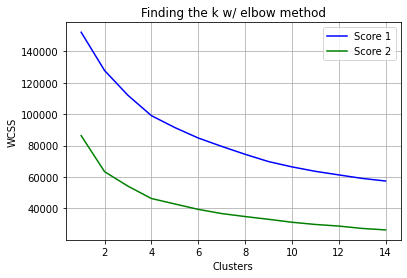

In [ ]:
sns.lineplot(x=range(1,15), y=scores, color='b', label='Score 1')
sns.lineplot(x=range(1,15), y=scores2, color='g', label='Score 2')
plt.grid()
plt.title('Finding the k w/ elbow method') # 4 or 6 looks good
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.legend() # WCSS score is generally lower after the autoencoder encoding and pca

In [ ]:
# we take 6 this time
kmeans = KMeans(n_clusters=6)
kmeans.fit(pred)
labels = kmeans.labels_

In [ ]:
# add the cluster column again
X = pd.DataFrame(data=pred, columns=range(1,11))

In [ ]:
# next is PCA again, so we can plot in two axis in the end
pca = PCA(n_components=2)
components = pca.fit_transform(X)

In [ ]:
pca_df = pd.DataFrame(data=components, columns=['pca1', 'pca2'])

In [ ]:
pca_df['cluster'] = labels # we can do that after pca was applied

In [ ]:
pca_df.head()

,pca1,pca2,cluster
0,-1.805979,-0.069288,2
1,0.000571,1.840997,4
2,0.186145,-0.153455,2
3,-0.890634,0.044658,2
4,-1.700730,0.036919,2


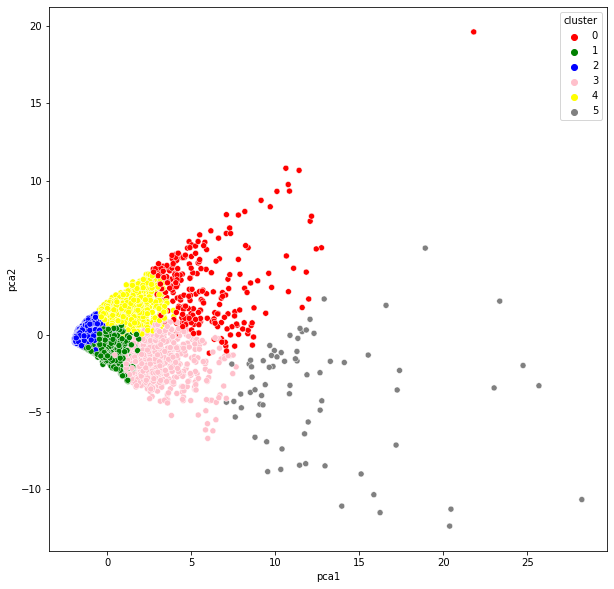

In [ ]:
# visualization of the two dimensional features
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray'])
plt.show()

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS